In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
#Deletion of unwanted column
df.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
#Dropping year column because it already present in date column
df.drop('year',inplace=True,axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,Charlotte


In [5]:
print(df.type.unique(),'\n',df.region.unique())

['conventional'] 
 ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'Columbus'
 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'SanDiego' 'SanFrancisco'
 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis'
 'Syracuse' 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [6]:
#changing data type of date column
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
region                  object
dtype: object

In [8]:
#Checking if any null value is present in dataset or not
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

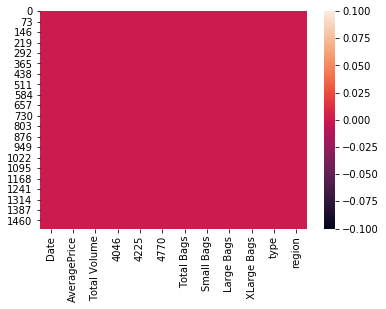

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000


High std present for total bags,small bags,Total Volume means data spread to much,range is high
for 4225,4770, mean is greater than median it means data is right skewed
If large gap between 75 percentile and max means outlier is present in that column(Total bags,small bags,XLarge Bags,Total volume)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  type          1517 non-null   object        
 11  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 142.3+ KB


In [12]:
df.region.value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
DallasFtWorth          17
Roanoke     

In [13]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000


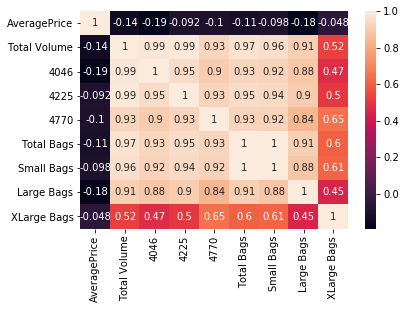

In [14]:
sns.heatmap(dfcor,annot=True)

correlation is not that much spread it.
Values between 0 and 0.3 (0 and −0.3) indicate a weak positive (negative) linear relationship

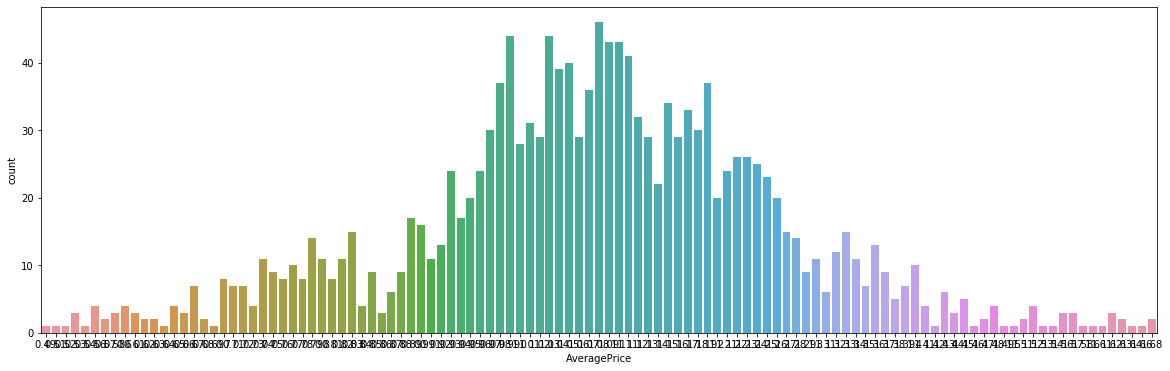

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(df["AveragePrice"])

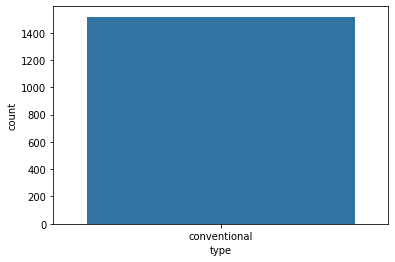

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='type',data=df)
plt.xlabel('type')
plt.show()

No handles with labels found to put in legend.


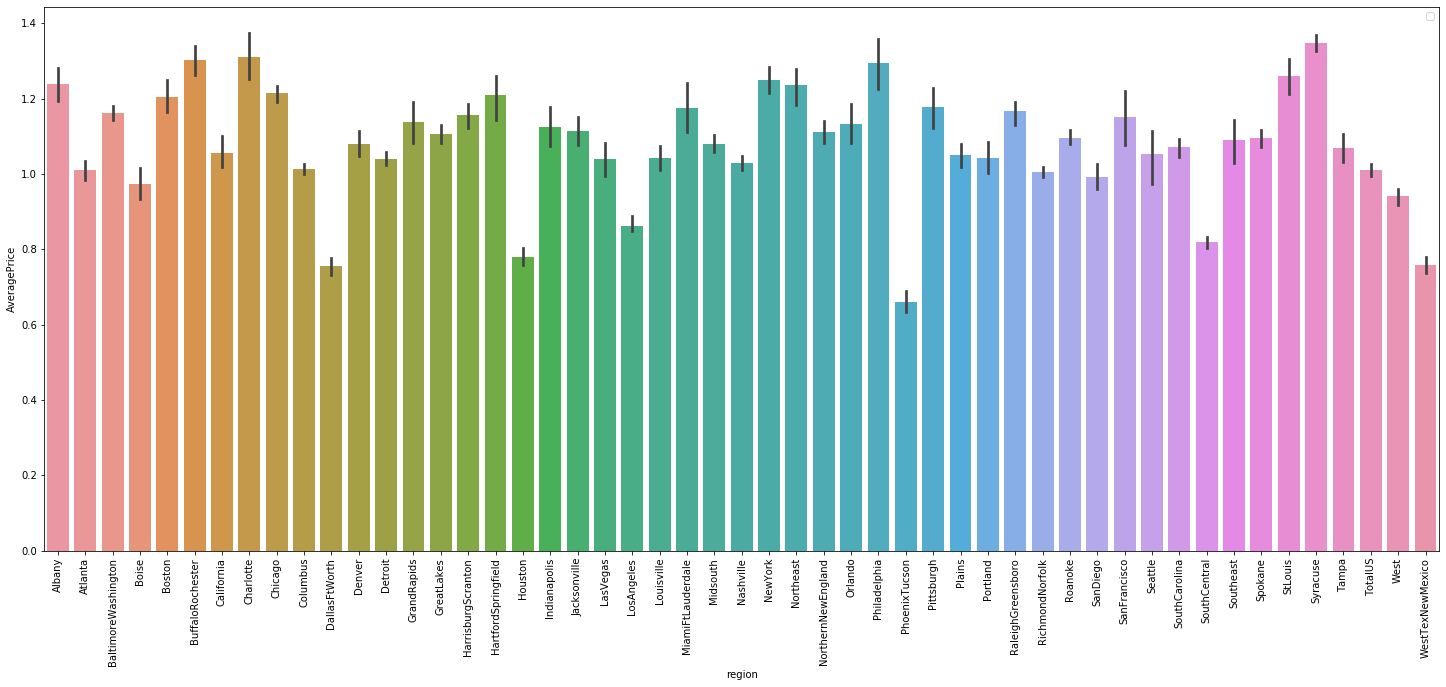

In [17]:
plt.figure(figsize=(25,10))
sns.barplot('region' ,'AveragePrice', data=df)
plt.xlabel('region')
plt.xticks(rotation=90)
plt.legend()
plt.show()

No handles with labels found to put in legend.


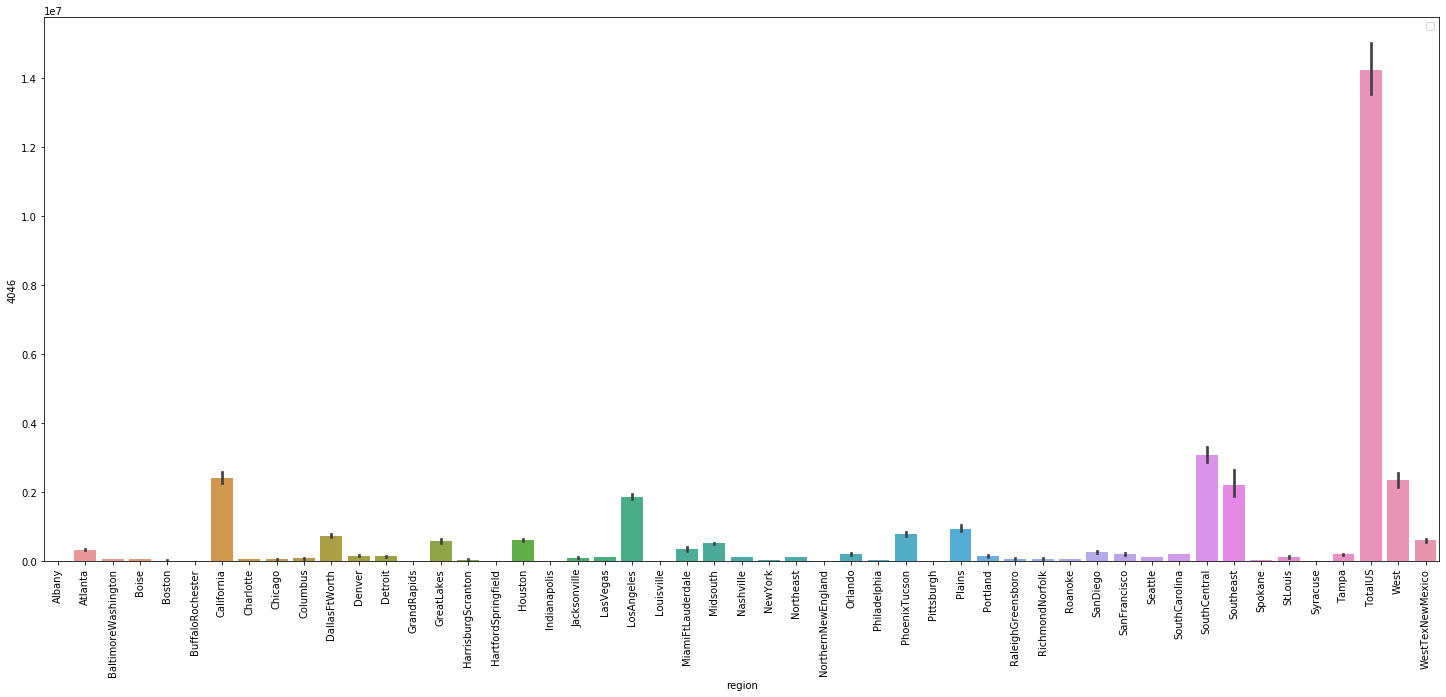

In [18]:
plt.figure(figsize=(25,10))
sns.barplot('region' ,'4046', data=df)
plt.xlabel('region')
plt.xticks(rotation=90)
plt.legend()
plt.show()

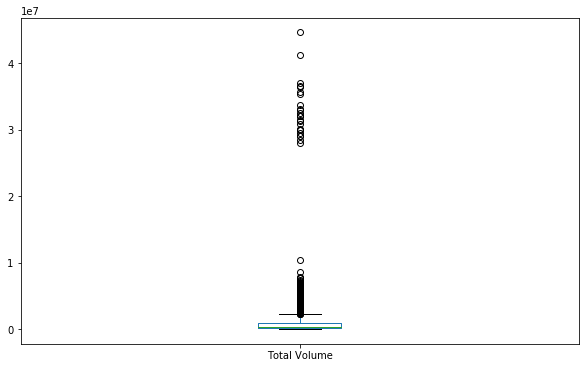

In [19]:
plt.figure(figsize=(10,6))
df['Total Volume'].plot.box()

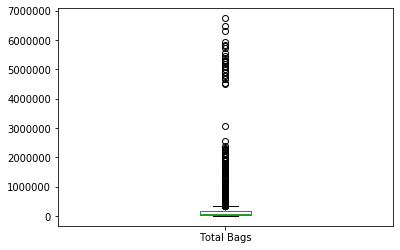

In [20]:
df['Total Bags'].plot.box()

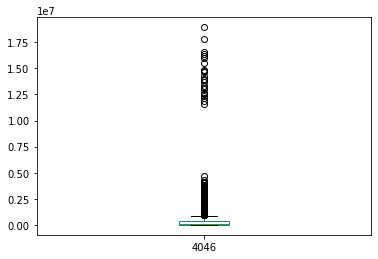

In [21]:
df['4046'].plot.box()

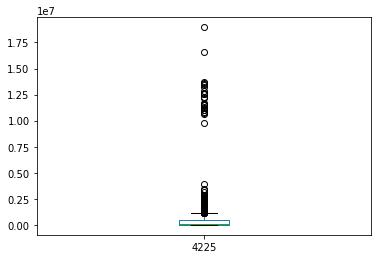

In [22]:
df['4225'].plot.box()

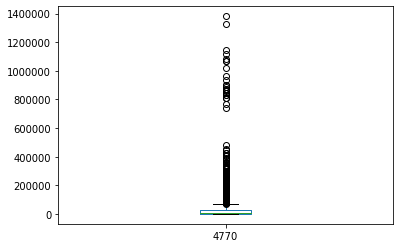

In [23]:
df['4770'].plot.box()

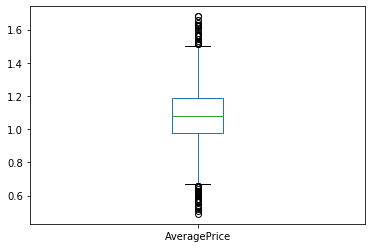

In [24]:
df['AveragePrice'].plot.box()

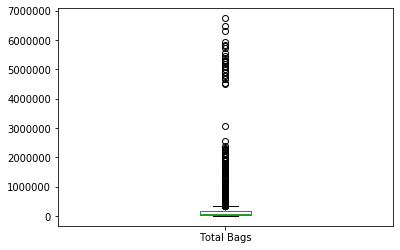

In [25]:
df['Total Bags'].plot.box()

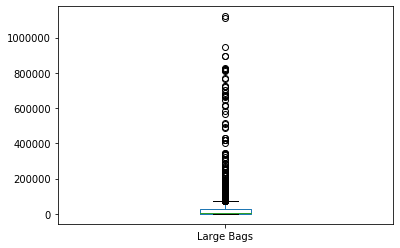

In [26]:
df['Large Bags'].plot.box()

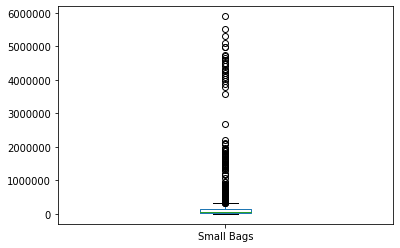

In [27]:
df['Small Bags'].plot.box()

By observing above boxplot we can say there is outlier present in data set 

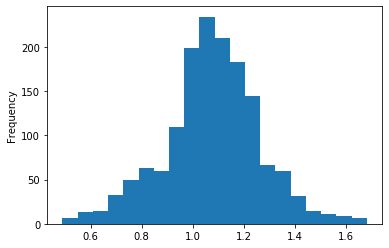

In [28]:
df['AveragePrice'].plot.hist(bins=20)

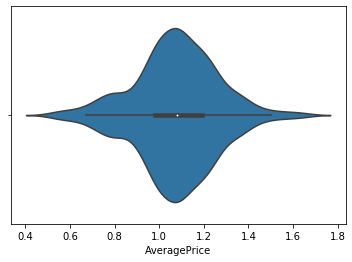

In [29]:
sns.violinplot(df['AveragePrice'])

Maximum average price in between 1.0 to 1.2

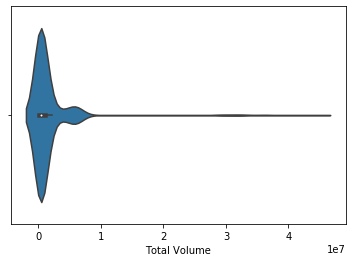

In [30]:
sns.violinplot(df['Total Volume'])

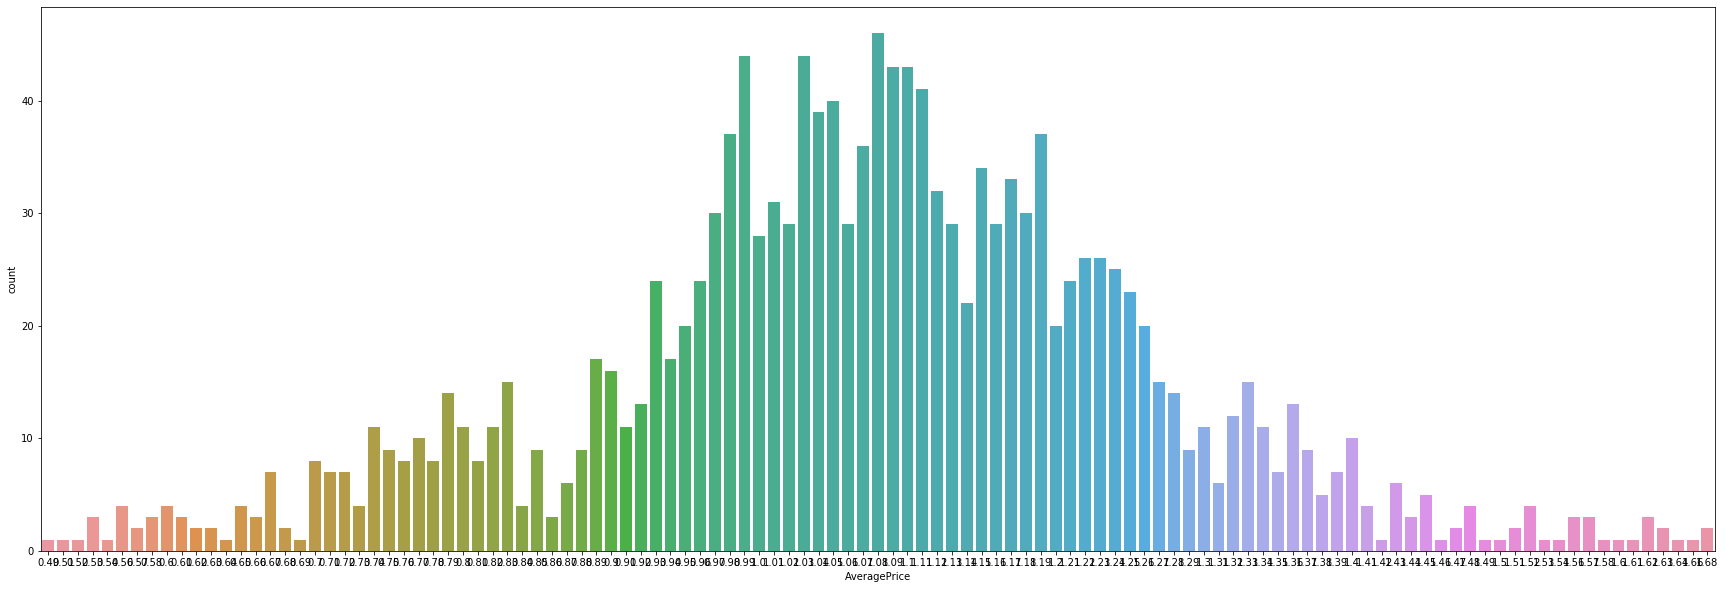

In [31]:
plt.figure(figsize=(30,10))
sns.countplot(df['AveragePrice'])

Text(0.5, 0, 'Total Volume')

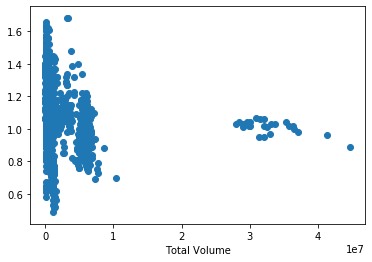

In [32]:
plt.scatter(df['Total Volume'],df['AveragePrice'])
plt.xlabel('Total Volume')

average is more when total volume in between 0 to 1 

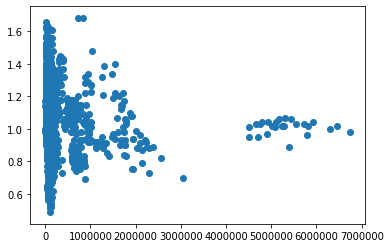

In [33]:
plt.scatter(df['Total Bags'],df['AveragePrice'])

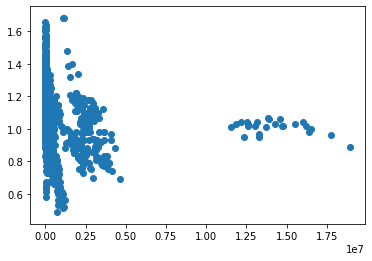

In [34]:
plt.scatter(df['4046'],df['AveragePrice'])

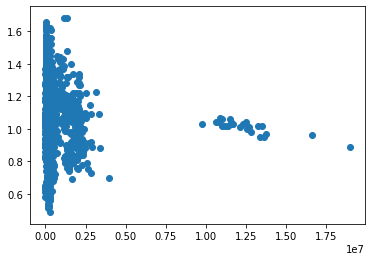

In [35]:
plt.scatter(df['4225'],df['AveragePrice'])

In [36]:
le=LabelEncoder()

df['type']=le.fit_transform(df['type'])
#0->Conventional
df['region']=le.fit_transform(df['region'])

In [37]:
# Seperating the date and month and year
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop('Date',inplace=True,axis=1)

In [38]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0,12,6,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,7,16,10,2016
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,7,10,9,2016
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,7,10,2,2016
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,7,25,9,2016


In [39]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
region          0.288146
Day             0.041303
Month           0.101439
Year            1.828332
dtype: float64

<Figure size 1008x1584 with 0 Axes>

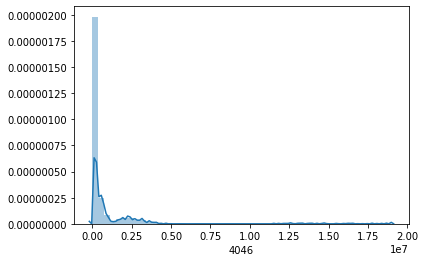

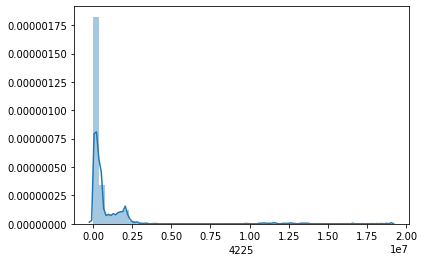

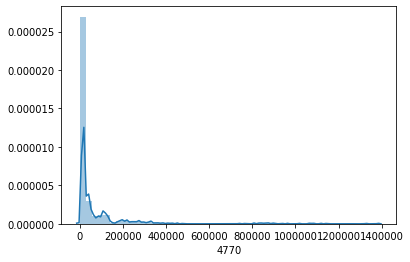

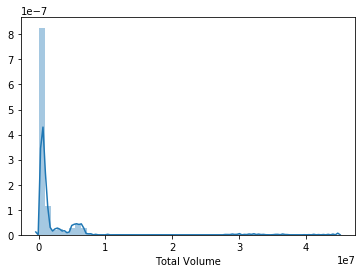

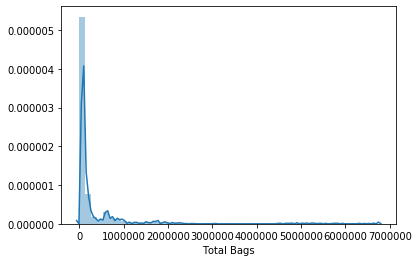

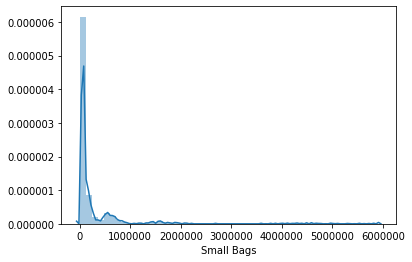

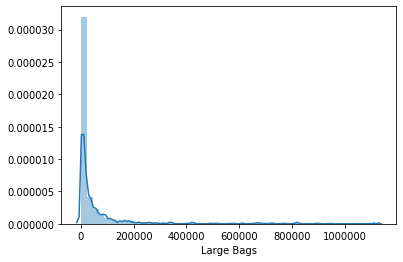

In [40]:
lst=['4046','4225','4770','Total Volume','Total Bags','Small Bags','Large Bags']
fig = plt.figure(figsize=(14,22))
for i in lst:
    plt.figure(i)
    sns.distplot(df[i])

In [41]:
lst=['4046','4225','4770','Total Volume','Total Bags','Small Bags','Large Bags']
for i in lst:
    df[i]=np.log(df[i])

In [42]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667461
4046           -0.160523
4225            0.184359
4770                 NaN
Total Bags      0.695445
Small Bags      0.713786
Large Bags           NaN
XLarge Bags     5.775077
type            0.000000
region          0.288146
Day             0.041303
Month           0.101439
Year            1.828332
dtype: float64

<Figure size 1008x1584 with 0 Axes>

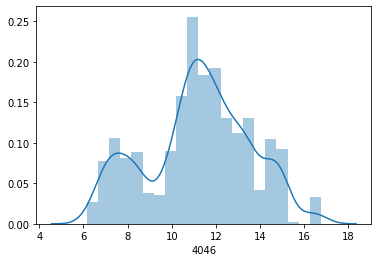

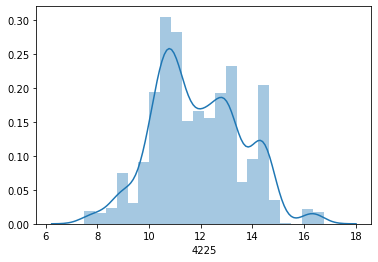

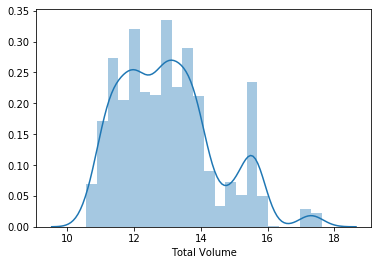

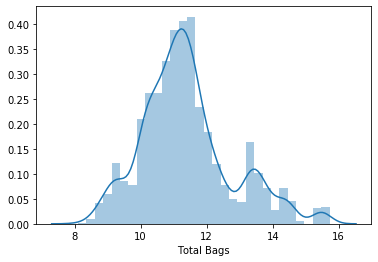

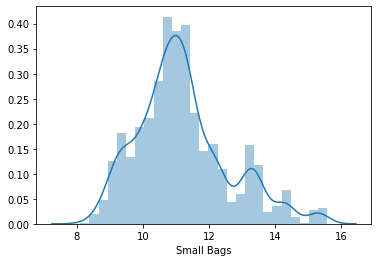

In [43]:
lst=['4046','4225','Total Volume','Total Bags','Small Bags']
fig = plt.figure(figsize=(14,22))
for i in lst:
    plt.figure(i)
    sns.distplot(df[i])

In [44]:
df.drop(['Large Bags','4770'],inplace=True,axis=1)

In [45]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [47]:
print(x_train.shape,'\t',x_test.shape)

(1061, 11) 	 (456, 11)


In [48]:
print(y_train.shape,'\t',y_test.shape)

(1061,) 	 (456,)


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [50]:
model=[DecisionTreeRegressor(),LinearRegression(),KNeighborsRegressor(),SVR(),Lasso(),Ridge()]

In [51]:
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("Errors:")
    print('Mean absolate error',mean_absolute_error(y_test,pred))
    print('Mean Squred error',mean_squared_error(y_test,pred))
    print('RootMean Squred error',np.sqrt(mean_absolute_error(y_test,pred)))
    print('R2_Score',r2_score(y_test,pred))
    print('***********************************************************************************')
    print('\n')
    

Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 1.0
Errors:
Mean absolate error 0.08298245614035088
Mean Squred error 0.014431140350877194
RootMean Squred error 0.28806675639571966
R2_Score 0.5819009175402035
***********************************************************************************


Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.3762383839637503
Errors:
Mean absolate error 0.11397875496487138
Mean Squred error 0.022177956216349385
RootMean Squred error 0.33760739767497894
R2_Score 0.35746012307852115
*****************************************************************************

In [52]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
print('Score of',DT.score(x_train,y_train))
pred=DT.predict(x_test)
print("Errors:")
print('Mean absolate error',mean_absolute_error(y_test,pred))
print('Mean Squred error',mean_squared_error(y_test,pred))
print('RootMean Squred error',np.sqrt(mean_absolute_error(y_test,pred)))
print('R2_Score',r2_score(y_test,pred))

Score of 1.0
Errors:
Mean absolate error 0.08098684210526313
Mean Squred error 0.013676973684210525
RootMean Squred error 0.284581872411549
R2_Score 0.6037506386078757


In [53]:
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
gd_dt=GridSearchCV(estimator=DT,param_grid=parameters,cv=5)
gd_dt.fit(x,y)
bestparam=gd_dt.best_params_
print(bestparam)
bestresult=gd_dt.best_score_
print(bestresult)

{'max_depth': 7, 'min_samples_split': 490}
0.182526226993167


In [54]:
dtscore=cross_val_score(DT,x,y,cv=5)
print('cross validation=',dtscore)
print(dtscore.mean(),dtscore.std())

cross validation= [-2.16671644 -0.37497283  0.56414239 -0.32493501  0.13113328]
-0.434269721534901 0.9309510335163416


Task 2 classification way

In [55]:
x=df.drop('region',axis=1)
y=df['region']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 44)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    print(m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score',accuracy_score(y_test,pred))
    print('Confusion Metrix',confusion_matrix(y_test,pred))
    print('Classification report',classification_report(y_test,pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score 0.10087719298245613
Confusion Metrix [[16  0  1 ...  0  0  0]
 [14  0  3 ...  0  0  0]
 [ 9  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 4  0  3 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]]
Classification report               precision    recall  f1-score   support

           0       0.05      0.89      0.10        18
           1       0.00      0.00      0.00        20
           2       0.16      0.42      0.23        19
           3       0.18      0.17      0.17        18
           4       0.12      0.05      0.07        22
           5       0.00      0.00      0.00        12
           6       0.31      0.78      0.44        18
           

In [59]:
dtscore=cross_val_score(DecisionTreeClassifier(),x,y,cv=7)
print('cross validation=',dtscore)
print(dtscore.mean(),dtscore.std())

cross validation= [0.73732719 0.73271889 0.83410138 0.82949309 0.83870968 0.83796296
 0.77777778]
0.7982987101650697 0.04456226319017749


In [60]:
from sklearn.externals import joblib
joblib.dump(DecisionTreeClassifier(),'DT_Avacado.pkl')

['DT_Avacado.pkl']